# **Морозова Дарья, ИАД-2**
# **Домашнее задание № 5**
## **Визуализация при обучении моделей машинного обучения**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

## 0. Загрузка данных

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
table_data.shape

(990, 194)

### Создание контрольного и обучающих множеств (1 балл)
*   Задайте random_seed, который необходимо будет использовать при всех случаях использования генератора случайных чисел
*   С помощью LabelEncoder закодируйте столбец species из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
*   В переменную X запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
*   Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
*   Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
import random

#применяем LabelEncoder к столбцу species
table_data.species = LabelEncoder().fit_transform(table_data.species)
y = table_data.species # Предсказываем, к какому растению относится каждый лист

X = np.asarray(table_data.drop('id', axis=1).drop('species', axis=1))

np.random.seed(42)
# Чтобы в контрольной выборке содержалось по 2 объекта каждого класса, берем test_size = 0.2
# (всего классов 99 => в контрольную выборке нужно взять 99*2=198 объектов, 198/990=0.2)
sss = StratifiedShuffleSplit(test_size = 0.2, n_splits = 1, random_state = np.random.randint(0, 17032020))

In [9]:
train_idx = [] 
test_idx = []
for train_index, test_index in sss.split(X, y): # Код по примеру из документации
    print("TRAIN:", train_index, "TEST:", test_index)
    train_idx.append(train_index)
    test_idx.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [236 411 292 628 641 794 923 313 312 255 670 341 103 746 151 660 282 383
 971 916 418 384 277 583 212 757   5 734 481 752 460 435 875 656 138 731
 812 573 818 696 824 248  29 458 663 267 250 579 596 221 591 206  79 703
 493 399 367 466 396 702  73  99 826 364 111 517  60 472 927 182 802 520
 799 378 366 499 571 133 560 330 618 713 316  68 134 307 174 543 649 626
 863 978 795 949 456 639  87 890 410 209 223  38 645  81  19 380 342 575
 622   7 848 283 951 441 339 264  92 671 870 770  43 478 390 414 114 464
 772 362 984 154 714 872 577  64 259  21 197 582 658 266 894  95  11 777
 107 284 386 216 104 253 981 539  71  53 964  41 969  12 422 454 854 117
 877 945 688  77  75 914 687 851 510 237 633 140 343 630 355 113 900  23
 112 925 803 605 719 679 118 720 717  31 291  28 504 908 931 762 775 929
 561 469  51 771  26 262 723   8 193 819 242 368 265  32 689 666 918 675
 269 842 979 205 484 637 397 615 219 162   2 695 451 550 142 476 176 457
 589 707 285 886 962 655  18 948 148 187 820

Теперь загрузим картинки. В папке images лежат 1584 изображения в градациях серого различного размера.

In [10]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


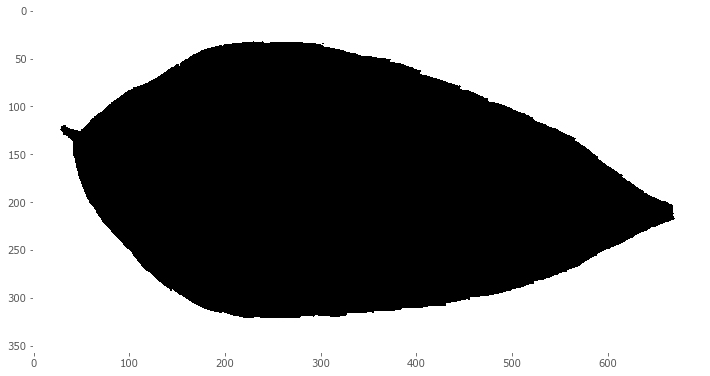

In [11]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

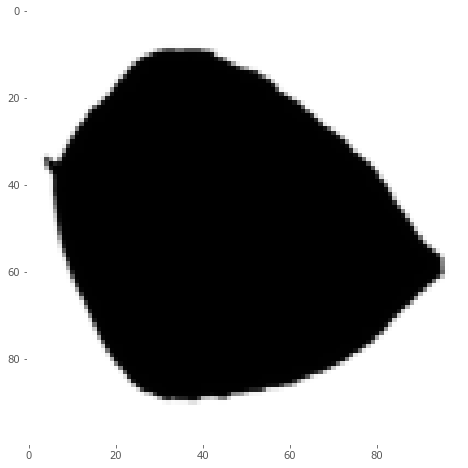

In [12]:
from skimage.transform import resize

img_resized = resize(img, (100, 100))

plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

### Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только те картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [13]:
imgs = []

for i in range(1, 1585):
    filepath = os.path.join(IMG_DIR, str(i) + '.jpg')
    img_resized = resize(plt.imread(filepath), (100, 100))
    img_resized = np.asarray(img_resized).ravel() # Делает массив плоским - будет 100*100=10000 элементов в векторе
    imgs.append(img_resized)
    
imgs = np.asarray(imgs)

In [14]:
imgs.shape

(1584, 10000)

Проверка, что изображения сохранились правильно:

In [15]:
imgs[0]

array([0., 0., 0., ..., 0., 0., 0.])

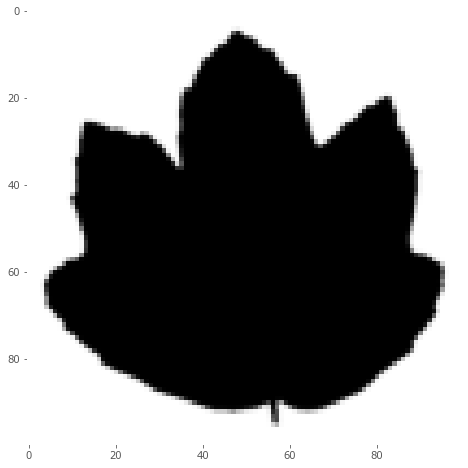

In [171]:
i1 = imgs[0]
i1.shape = (100, 100)
plt.imshow(i1, cmap='Greys')
plt.grid(None)

Сделайем два массива - с обучающими и контрольными картинками:

In [15]:
imgs_train = []
imgs_test = []

for ind in train_idx:
    id_i = table_data.loc[ind, 'id'] # находим id растения по индексу из train_idx, он равен номеру картинки, которую нужно добавить
    imgs_train.append(imgs[id_i - 1])
imgs_train = np.asarray(imgs_train)[0]

for ind in test_idx:
    id_i = table_data.loc[ind, 'id']
    imgs_test.append(imgs[id_i - 1])
imgs_test = np.asarray(imgs_test)[0]

In [16]:
imgs_train.shape

(792, 10000)

In [17]:
imgs_test.shape

(198, 10000)

## 1. Visualization
### Простая визуализация (1 балл код + 1 балл выводы)
*   Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
*   Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор)
*   Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

#### Изображения листьев (по одному каждого класса) :

In [19]:
# берем из датасета только часть, относящуюся к обучающей выборке
data_train = pd.DataFrame(np.asarray(table_data)[train_index])
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,394.0,14.0,0.000000,0.000000,0.017578,0.013672,0.025391,0.000000,0.007812,0.003906,...,0.000000,0.17773,0.000000,0.037109,0.027344,0.028320,0.0,0.073242,0.012695,0.000000
1,675.0,57.0,0.068359,0.095703,0.013672,0.003906,0.000000,0.136720,0.013672,0.000000,...,0.000000,0.00000,0.000000,0.008789,0.000000,0.300780,0.0,0.017578,0.000000,0.000000
2,482.0,79.0,0.031250,0.056641,0.029297,0.007812,0.007812,0.121090,0.019531,0.000000,...,0.000000,0.00000,0.001953,0.021484,0.038086,0.001953,0.0,0.007812,0.000000,0.043945
3,995.0,85.0,0.000000,0.000000,0.005859,0.017578,0.015625,0.000000,0.007812,0.000000,...,0.051758,0.00000,0.030273,0.000000,0.004883,0.000000,0.0,0.000000,0.051758,0.005859
4,1013.0,17.0,0.000000,0.005859,0.033203,0.001953,0.021484,0.007812,0.003906,0.003906,...,0.000000,0.00000,0.000000,0.047852,0.000000,0.224610,0.0,0.042969,0.005859,0.000000


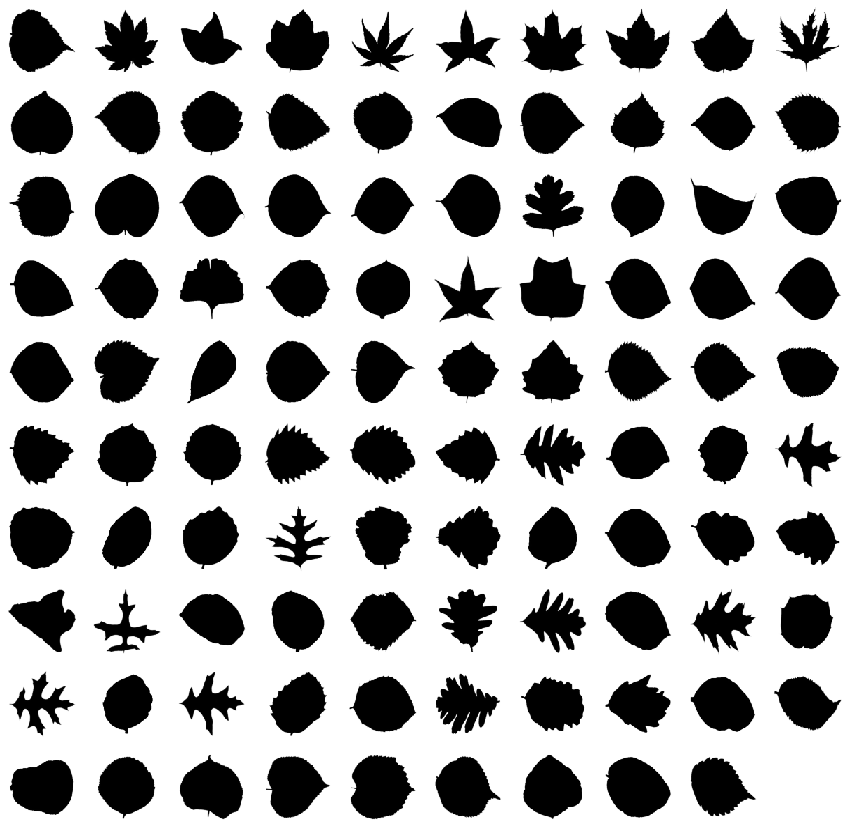

In [144]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

for i in range(0, 99):
    plt.subplot(10, 10, i + 1)
    l_sp = data_train[0][data_train[1] == i] # Список из id всех листов для вида i
    id_leaf = int(np.asarray(l_sp)[0]) # id первого листа данного вида i в датасете = номер его картинки
    image_leaf = imgs[id_leaf - 1] # Берем нужный лист из массива 
    image_leaf.shape = (100, 100) # Был вектор - делаем обратно матрицу для построения изображения
    plt.imshow(image_leaf, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.subplot(10, 10, 100)
plt.grid(None)
plt.axis("off")

plt.show()

#### 100 гистограмм значений случайно выбранных пикселей:

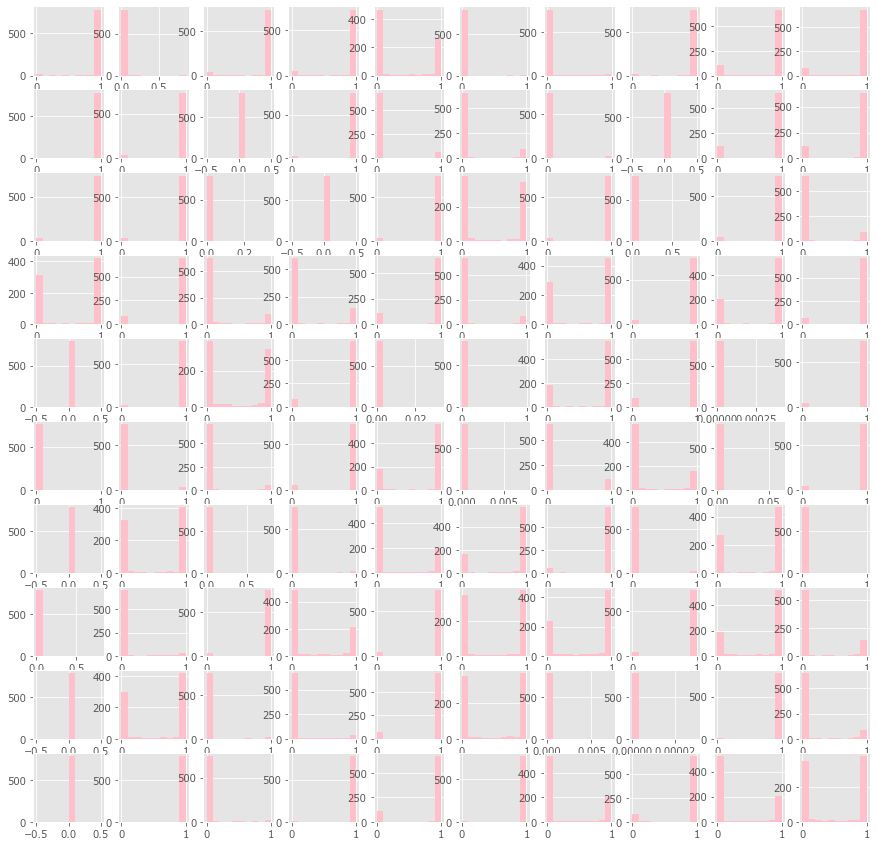

In [156]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

r = [i for i in range(0, 10000)]

for i in range(1, 101):
    plt.subplot(10, 10, i)
    j = np.random.choice(r) # Координата случайно выбранного пикселя
    r.remove(j) # Чтобы исключить возможность повтора выбора одного и того же пикселя
    pix = [] # Значния пикселя на всех картинках
    for k in imgs_train:
        pix.append(k[j])
    _ = plt.hist(pix, color = 'pink')

plt.show()

#### "Средний лист":

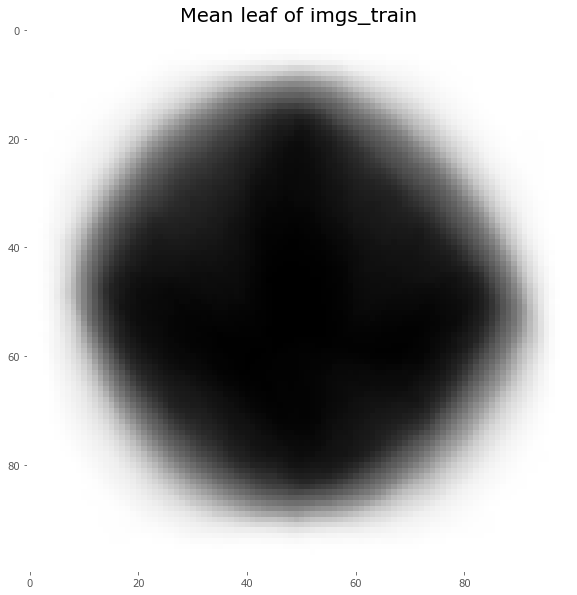

In [44]:
plt.figure(figsize = (15,10))
mean_pix = np.mean(imgs_train, axis = 0)
mean_pix.shape = (100, 100)
plt.imshow(mean_pix, cmap='Greys')
plt.grid(None)
plt.title("Mean leaf of imgs_train", fontsize = 20)
plt.show()

#### Разброс каждого пикселя :

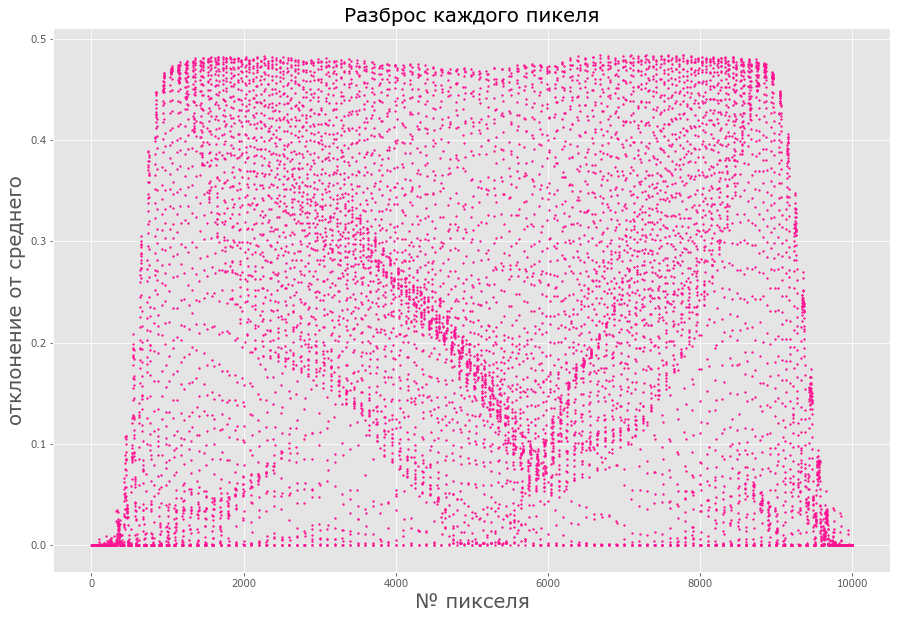

In [48]:
plt.figure(figsize = (15,10))

r = np.asarray([i for i in range(1, 10001)])
std_pix = np.std(imgs_train, axis = 0) # Среднеквадратичное столбцов

plt.scatter(r, std_pix, c = 'deeppink', s = 3)
plt.title("Разброс каждого пикеля", fontsize = 20)
plt.xlabel('№ пикселя', fontsize = 20)
plt.ylabel('отклонение от среднего', fontsize = 20)
plt.show()

#### Вопросы:
*  ##### Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?

Некоторые классы можно отличить друг от друга, например, сразу видны листья, похожие на листья дуба, клена и марихуаны. Но в болишинстве своем классы очень похожи между собой. Есть группы похожих классов: цельные (более округлые/овальные/с ребристыми краями), лопастные и раздельные листья.

*  ##### Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
Из гистограмм значений случайно выбранных пикселей: значения пикселей - числа от 0 до 1, это и есть соответственно минимальное и максимальное значения признаков. Множество значений признаков - числа с плавающей точкой. Чаще всего признаки принимают значения 0 и 1, поэтому распределения разных признаков в основном похожи между собой с точностью до зеркального отображения относительно y=0,5.

*  ##### Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?

Изображение можно бинаризовать без сильной потери информации, тк чаще всего пиксели принимают значения именно 0 и 1. Нам не важен фон листа, он не несет информации, поэтому можно занулить довольно большое число промежуточных чисел. Порог можно выбрать примерно 0,8-0.9 судя по гистограмам, т.к. в целом очень малое кол-во пикслелей принимают значения между 0 и 1.

*  ##### Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)?

У среднего листа довольно размытая граница и сам лист не равномерно раскрашен (из-за того, что лопастные и раздельные листья вносят свой вклад), но в целом по форме он похож на округлый цельный лист, тк их большинство. Константных пикселей много, середина листа довльно темная, значит, там самое большое число пикселя => чаще всего пиксель именно с такой координатой имел близкое к 1 число. Плюс из гистограмм значений случайно выбранных пикселей видно, что из 100 случайных пикселей где-то 2/3 являются примерно константными (почти на всех картинках принимают значения 1 и лишь на малом кол-ве 0 (и наоборот)). 

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)

*  Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
*  Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster_centers_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
*  Повторите предыдущие действия для 25 и 100 кластеров.

#### Кластеризация листьев на 9 кластеров:

In [198]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 9)
k_means = k_means.fit(imgs_train)
k_means.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Визуализируем центры кластеров:

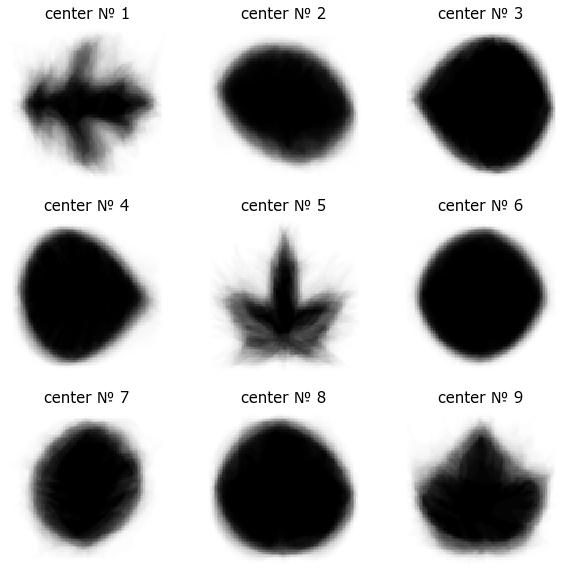

In [199]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(3, 3, i + 1)
    im = k_means.cluster_centers_[i]
    im.shape = (100, 100)
    plt.title("center № " + str(i+1), fontsize = 15)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.show()

#### Кластеризация листьев на 25 кластеров:

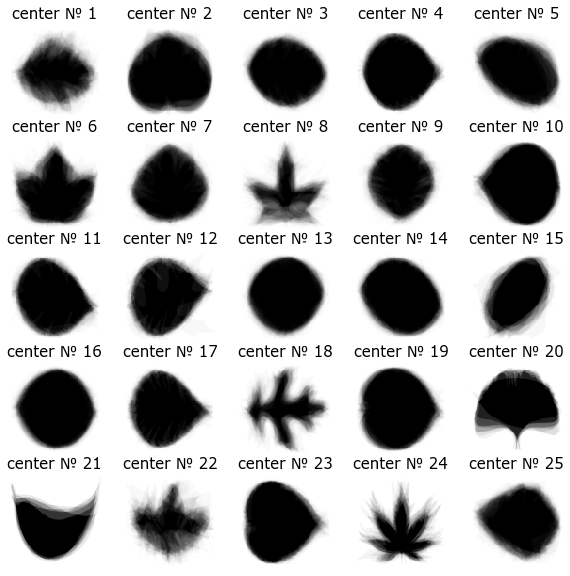

In [195]:
k_means = KMeans(n_clusters = 25)
k_means = k_means.fit(imgs_train)

fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize=(10, 10))

for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    im = k_means.cluster_centers_[i]
    im.shape = (100, 100)
    plt.title("center № " + str(i+1), fontsize = 15)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.show()

#### Кластеризация листьев на 100 кластеров:

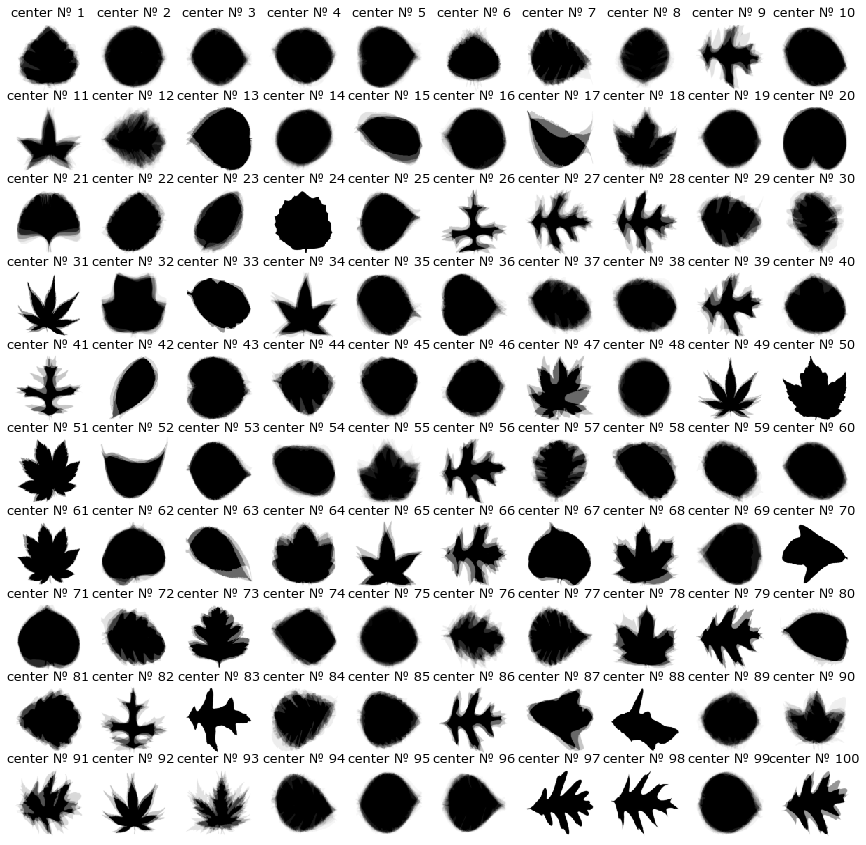

In [196]:
k_means = KMeans(n_clusters = 100)
k_means = k_means.fit(imgs_train)

fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

for i in range(0, 100):
    plt.subplot(10, 10, i + 1)
    im = k_means.cluster_centers_[i]
    im.shape = (100, 100)
    plt.title("center № " + str(i+1), fontsize = 13)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.show()

#### Вопросы:

*  ##### Похожи ли центры кластеров на листья?
Да, центры кластеров похожи на листья, причем чем больше количество кластеров, тем больше сходство с исходными листьями.

*  ##### В чем отличие от картинок листьев? В чем причина этого отличия?
Центры, в отличие от картинок листьев, в основном выглядят размыто. Причина такого отличия заключается в следующем: начальные точки - случайные центры кластеров, выбираются именно из картинок листов. Далее же на каждой иттерации вычисляетя новый центр кластеров как центр масс - данный вектор уже не обязательно содержится в матрице картинок листов, он просто задает какой-то набор пикселей, которые напоминают лист. Таким образом итоговый центр будет отличаться от красивого и ровного листа.

*  ##### Есть ли среди кластеров похожие (или повторяющиеся)? 
Да, есть, например, при разбиении на 9 кластеров центры 6 и 8 довольно схожи, на 25 кластеров - 23 и 19, на 100 кластеров - 27 и 28, 9 и 39, 79 и 100. Но точь-в-точь повторяющихся нет.

*  ##### Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?
При разбиении на 100 кластеров довольно много схожих центров. При 25 их все же мало, возможно стоит попробовать попробывать повысить разнообразие центров и кластеризовать на 35-55 кластеров.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)

Настройте 3 классификатора на изображениях и выполните их визуализацию.

*  Начнем с примитивного метрического классификатора - центроидного. Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
*  Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
*  Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в документации sklearn. Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
*  У MultinomialNB после обучения появляется атрибут feature_log_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса  (выведите форму атрибута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
*  Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
*  Отобразите веса для каждого класса в виде картинки 100x100.

#### 1 классификатор - центроидный:

In [20]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

nclf = NearestCentroid()
nclf.fit(imgs_train, y_train)

print("NearestCentroid accuracy = ", accuracy_score(nclf.predict(imgs_test), y_test))

NearestCentroid accuracy =  0.5505050505050505


Визуализируем центры:

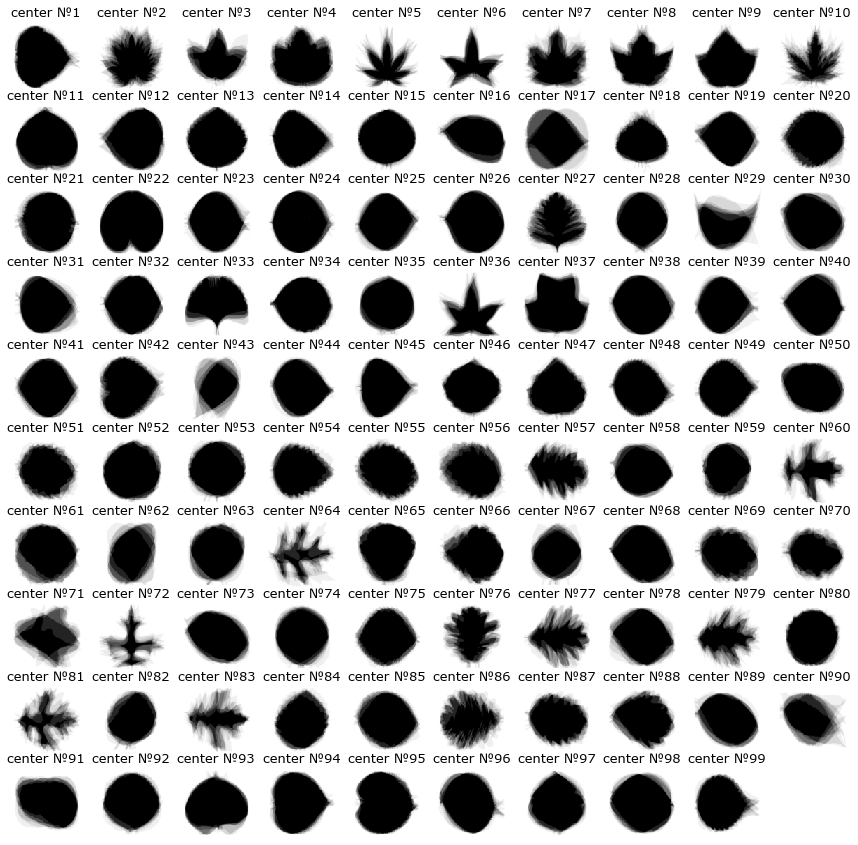

In [34]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

for i in range(0, 99):
    plt.subplot(10, 10, i + 1)
    im = nclf.centroids_[i]
    im.shape = (100, 100)
    plt.title("center №" + str(i+1), fontsize = 13)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.subplot(10, 10, 100)
plt.grid(None)
plt.axis("off")
plt.show()

#### 2 классификатор - наивный байесовский:

In [22]:
from sklearn.naive_bayes import MultinomialNB

mclf = MultinomialNB()
mclf.fit(imgs_train, y_train)

print("MultinomialNB accuracy = ", accuracy_score(mclf.predict(imgs_test), y_test))

MultinomialNB accuracy =  0.46464646464646464


Визуализируем feature_log_prob_:

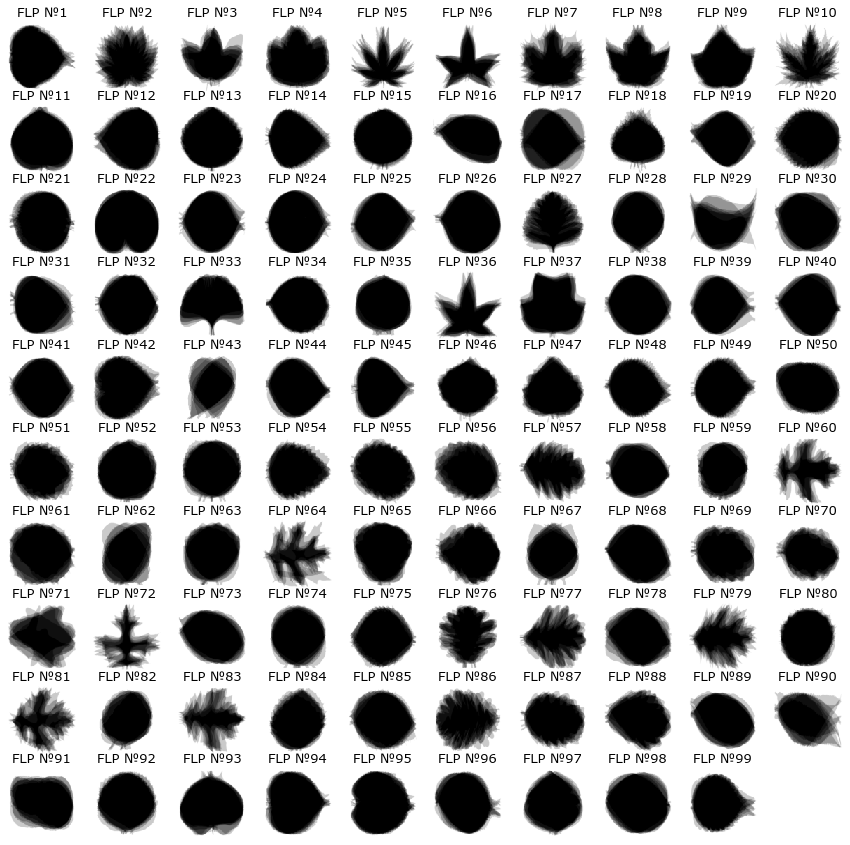

In [36]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

for i in range(0, 99):
    plt.subplot(10, 10, i + 1)
    im = mclf.feature_log_prob_[i]
    im.shape = (100, 100)
    plt.title("FLP №" + str(i+1), fontsize = 13)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.subplot(10, 10, 100)
plt.grid(None)
plt.axis("off")
plt.show()

#### 3 классификатор - линейный:

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000, dual = False) # Пыталась настроить параметры, чтобы не было предупреждения снизу
logreg.fit(imgs_train, y_train)

print("LogisticRegression accuracy = ", accuracy_score(logreg.predict(imgs_test), y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression accuracy =  0.6212121212121212


Визуализируем веса для каждого класса:

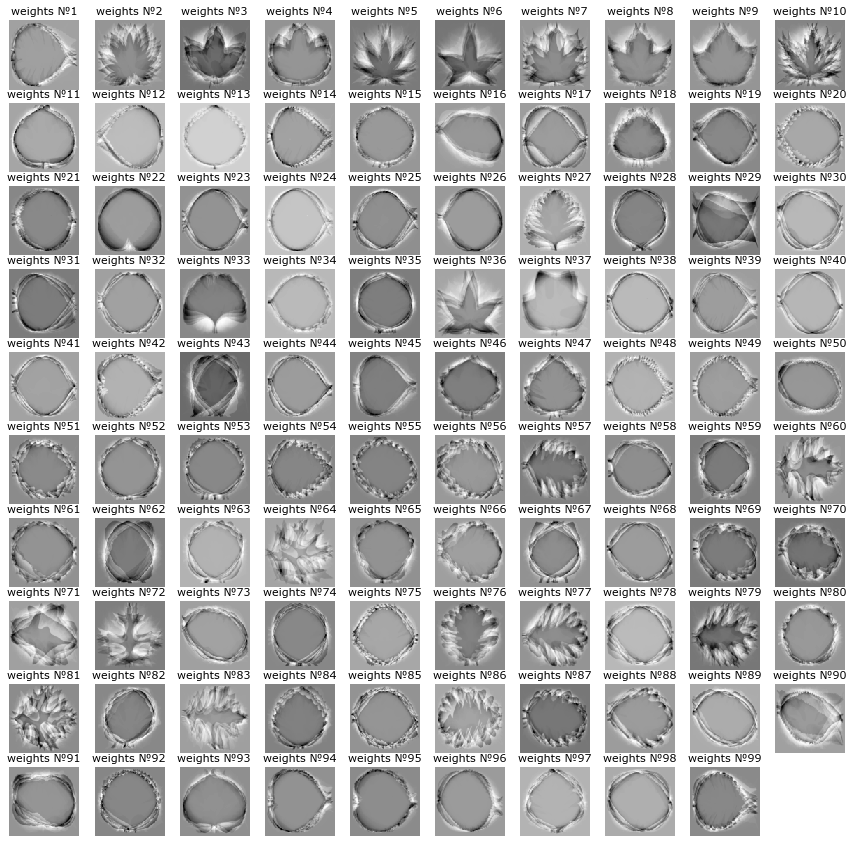

In [39]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))

for i in range(0, 99):
    plt.subplot(10, 10, i + 1)
    im = logreg.coef_[i]
    im.shape = (100, 100)
    plt.title("weights №" + str(i+1), fontsize = 11)
    plt.imshow(im, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

plt.subplot(10, 10, 100)
plt.grid(None)
plt.axis("off")
plt.show()

#### Вопросы:

*  ##### Какой классификатор работает лучше? Предположите, почему.

Лучшее качество у линейного классификатора, хоть лог регрессия и не сошлась полностью, худшее - у наивного байесовского. Логистическая функция потерь лучше минимизирует ошибку.

*  ##### Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?

Центры кластеров и визуализированные вероятности очень похожи на исходные изображения листьев (только размытые), а также довольно схожи между собой. Веса отличаются от листьев тем, что, изображая листья, мы получали четкие черные фигуры на белом фоне, в случае весов же мы имеем очертания листьев на сером фоне. 

*  ##### Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?
Линейный классификатор зануляет лишь малое кол-во весов.

### Случайный лес (0.25 балла код + 0.25 балла выводы)

*  Настройте случайный лес на изображениях. Выведите качество на контроле.
*  Отобразите feature_importances_ в виде картинки 100x100.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(imgs_train, y_train)

print("RandomForest accuracy = ", accuracy_score(rf_clf.predict(imgs_test), y_test))

RandomForest accuracy =  0.5555555555555556


Отобразим feature_importances_ в виде картинки:

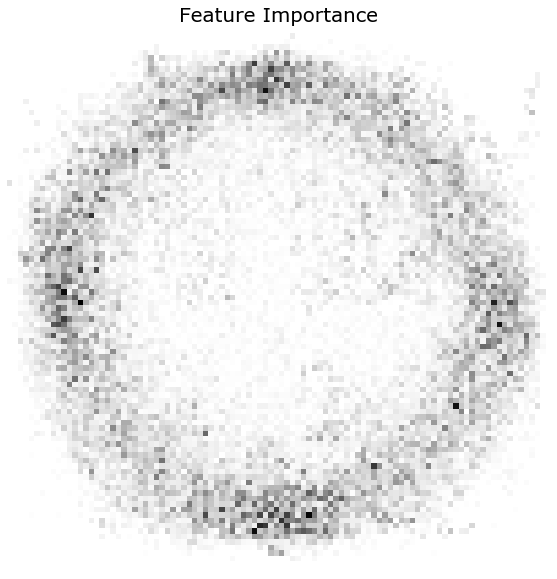

In [28]:
plt.figure(figsize = (15,10))
plt.title("Feature Importance", fontsize = 20)
fimp_im = np.asarray(rf_clf.feature_importances_)
fimp_im.shape = (100, 100)
plt.imshow(fimp_im, cmap='Greys')
plt.grid(None)
plt.axis("off")
plt.show()

#### Вопросы:

*  ##### похожа ли картинка на изображение листа?

Нет, картинка не похожа на обычный лист.

*  ##### соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

Картинка похожа на правду. Чем темнее точка - тем важнее признак, соответствующий этому пикселю. Самые темные точки расположены так, что напоминают границу листа. Действительно, мы классифицируем лист по форме его границы, поэтому она является самым важным признаком (=> участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа, т.к. находятся за границей и характеризуют только белый фон за листом, который не содержит никакой информации.). Вообще картинка напоминает средний лист, нарисованный выше, только в другой интенсивности цветов.

Глядя на изображение разброса каждого признака по выборке видно, что только примерно 250 первых и последних признаков наименее отклонены от среднего значения (тк это соответствует краям картинок, которые всегда белые). Далее разброс признаков возрастает.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)

Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?

*  Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
*  Для RF на исходных признаках выведите качество и на контроле, и на обучении.
*  На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

Примечание. Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [18]:
num_components = 2**np.arange(10)
num_components

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)

In [42]:
from sklearn.decomposition import PCA

accuracy_train_pca = []
accuracy_test_pca = []

for c in num_components:
    pca = PCA(n_components = c)
    pca.fit(imgs_train)
    
    # Наборы данных после пониженной размерности
    imgs_train_pca = pca.transform(imgs_train)
    imgs_test_pca = pca.transform(imgs_test)
    
    # Обучаем на новых данных случайный лес
    rf_clf1 = RandomForestClassifier()
    rf_clf1.fit(imgs_train_pca, y_train)
    
    # Сохраним качество на обучении и контроле
    accuracy_train_pca.append(rf_clf1.score(imgs_train_pca, y_train))
    accuracy_test_pca.append(rf_clf1.score(imgs_test_pca, y_test))

In [43]:
accuracy_train_pca

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [44]:
accuracy_test_pca

[0.06565656565656566,
 0.1111111111111111,
 0.2878787878787879,
 0.4696969696969697,
 0.5353535353535354,
 0.5555555555555556,
 0.5303030303030303,
 0.5404040404040404,
 0.5050505050505051,
 0.45454545454545453]

Качество на контроле и обучении для RF на исходных признаках:

In [45]:
print("RandomForest accuracy_train = ", rf_clf.score(imgs_train, y_train))
print("RandomForest accuracy_test = ", rf_clf.score(imgs_test, y_test))

RandomForest accuracy_train =  1.0
RandomForest accuracy_test =  0.5555555555555556


Графики:

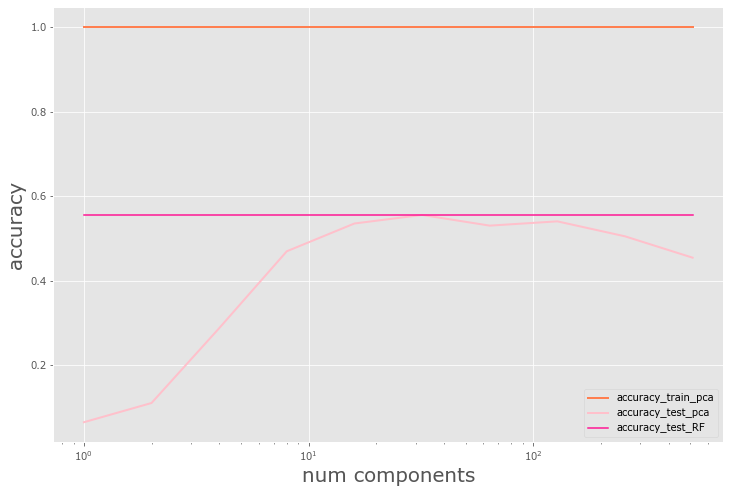

In [50]:
plt.figure(figsize = (12,8))

accuracy_test = [rf_clf.score(imgs_test, y_test)]*10

plt.plot(num_components, accuracy_train_pca, c = 'coral', linewidth = 2) # качество на обучении
plt.plot(num_components, accuracy_test_pca, c = 'pink', linewidth = 2) # качество на контроле
plt.plot(num_components, accuracy_test, c = 'deeppink') # качество на контроле на исходных признаках
plt.legend(['accuracy_train_pca', 'accuracy_test_pca', 'accuracy_test_RF'], loc = 4)
plt.xlabel('num components', fontsize = 20)
plt.ylabel('accuracy', fontsize = 20)
plt.xscale("log") # чтобы масштаб по оси абсцисс был логарифмическим.

plt.show()

#### Вопросы:

*  ##### Можно ли сказать, что случайный лес переобучается?
Случайный лес дает маленькое качество, поэтому, возможно...

*  ##### Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

Число компонент, при котором достигается максимальное качество на контроле, равно 32. В этом случае качество на тестовой выборке RF+PC совпадает с качеством на всех признаках обычного RF.

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [49]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_train, y_train)

print("RandomForest on data accuracy = ", accuracy_score(rf_clf2.predict(X_test), y_test))
print("RandomForest on images accuracy = ", accuracy_score(rf_clf.predict(imgs_test), y_test))

RandomForest on data accuracy =  0.9696969696969697
RandomForest on images accuracy =  0.5555555555555556


Качество изменилось значительно! Значит, обычные харакеристики листьев лучше описывают объекты, чем пиксле изображений объектов (возможно, они получены из пикселей масштабированием/отбором признаков/любой другой предобработкой данных, что улучшает качество).

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса

С помощью GridSearchCV или RandomizedSearchCV подберите параметры для случайного леса для модели на табличных данных.
*  Используйте StratifiedKFold на 4х фолдах (используйте только обучающую выборку). Мера качества - accuracy 
*  Примените оптимальную модель на контрольной выборке
*  Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

RandomizedSearchCV:

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 15, 15)]
min_samples_split = [int(x) for x in np.linspace(2, 50, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 50, 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rscv = RandomizedSearchCV(RandomForestClassifier(), 
                        param_dist, 
                        n_iter = 100, 
                        cv = StratifiedKFold(n_splits = 4), 
                        verbose = 1,
                        n_jobs= -1)
rscv.fit(X_train, y_train)
rscv.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 13.3min finished


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 12,
 'max_features': 'log2',
 'max_depth': 13,
 'bootstrap': True}

Оптимальная модель на контрольной выборке:

In [60]:
rfc_3 = rscv.best_estimator_
print("RF + RSCV accuracy = ", rfc_3.score(X_test, y_test))

RF + RSCV accuracy =  0.9444444444444444
